# Census Income project

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv('Census_Income_Project.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape                                              # Check Shape of data in dataset

(32560, 15)

We have 32560 rows and 15 columns including the target column.

In [5]:
df['Income'].value_counts()                            #Check the value counts of target variable.

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [6]:
df.columns                                             # Check the number of columns in the dataset

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Exploratory Data Analysis 

# Graphical Representation

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

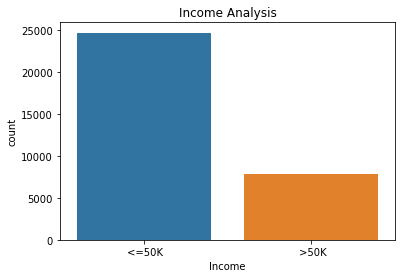

In [8]:
# Countplot Display distribution of data across Income Analysis.
sns.countplot(x='Income',data=df);
plt.title('Income Analysis')
plt.show()

Just by observing graph above, the income <=50k is high when compared to >50k.

<AxesSubplot:title={'center':'Workclass Analysis'}, xlabel='Workclass', ylabel='count'>

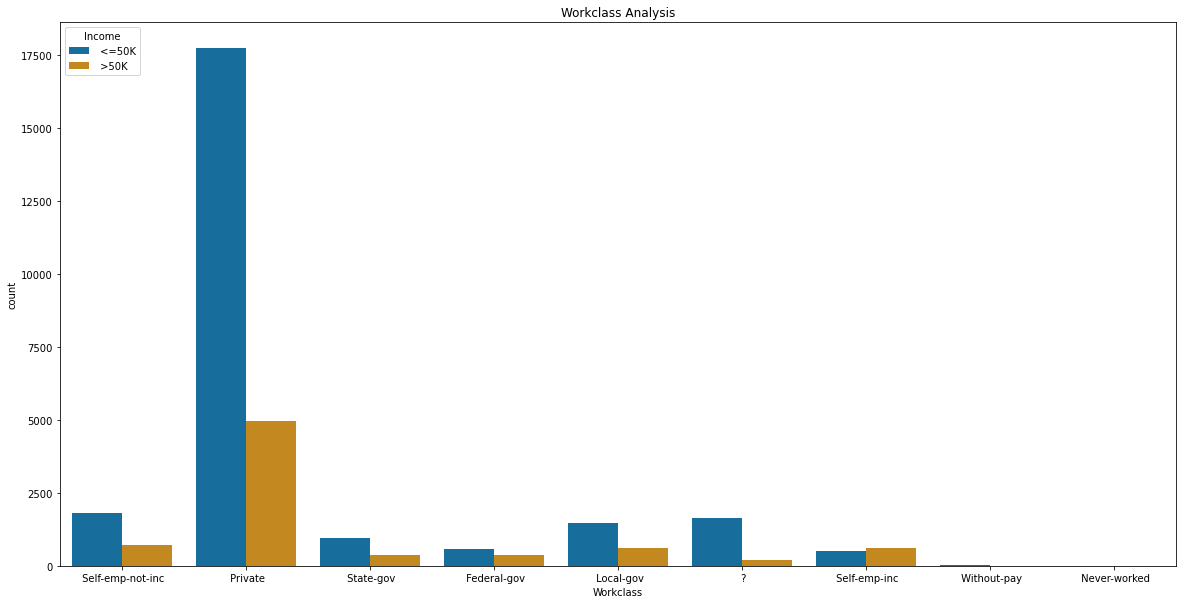

In [9]:
#Countplot Display distribution of data across Workclass Analysis.
plt.subplots(figsize=(20,10))
plt.title('Workclass Analysis')
sns.countplot(x='Workclass',hue='Income',data=df,palette='colorblind')

The Income is high at the Workclass of Private Sector and remaining sector has low count.

<AxesSubplot:title={'center':'Age Analysis'}, xlabel='Age', ylabel='count'>

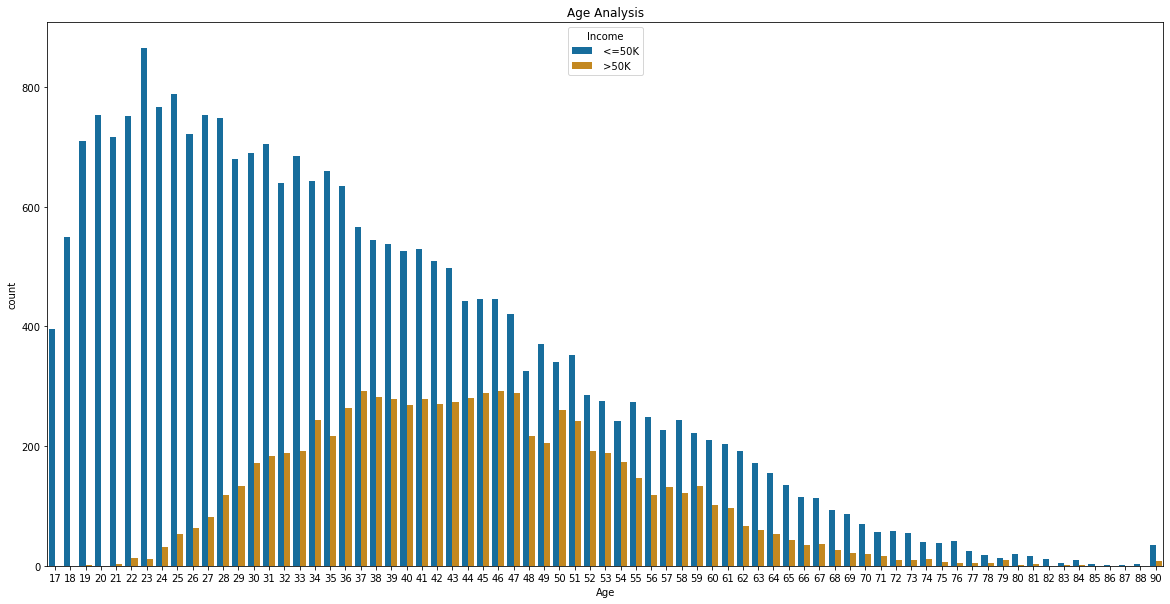

In [10]:
# Countplot Display distribution of data across Age Analysis.
plt.subplots(figsize=(20,10))
plt.title('Age Analysis')
sns.countplot(x='Age',hue='Income',data=df,palette='colorblind')

<AxesSubplot:title={'center':'Sex vs Age'}, xlabel='Sex', ylabel='Age'>

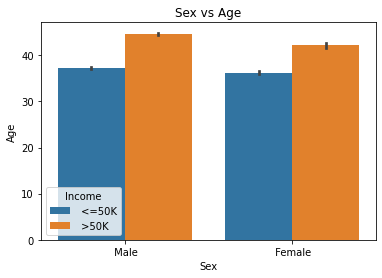

In [11]:
# Barplot Display distribution of data across Sex vs Age.
plt.title('Sex vs Age')
sns.barplot(x='Sex',y='Age',hue='Income',data=df)

The income is slightly high for male candiate on both income range.

<AxesSubplot:title={'center':'Sex vs Age'}, xlabel='Sex', ylabel='Age'>

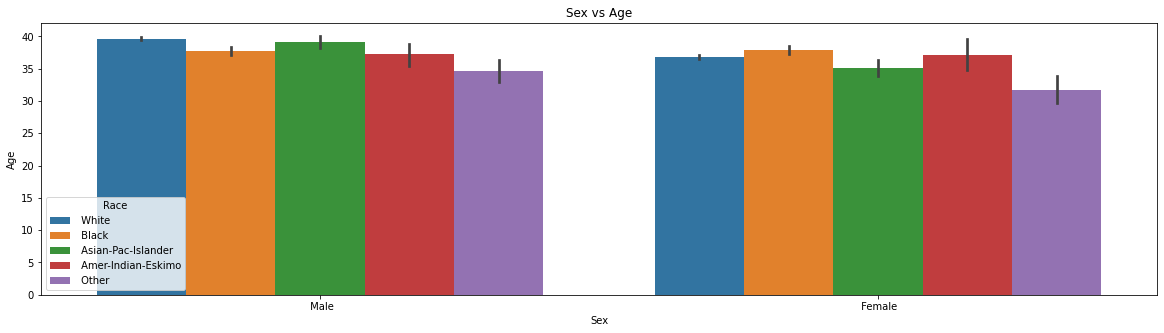

In [12]:
# Barplot Display distribution of data across Sex vs Age.
plt.figure(figsize=(20,5))
plt.title('Sex vs Age')
sns.barplot(x='Sex',y='Age',hue='Race',data=df)

According to graph, the male & female candiate with white race & black race has involved more when compared to others respectively.

<AxesSubplot:title={'center':'Sex vs Age'}, xlabel='Sex', ylabel='Age'>

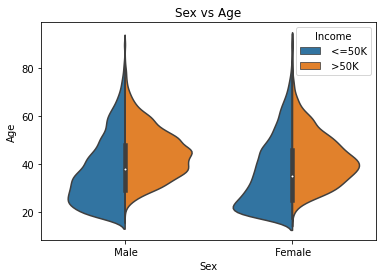

In [13]:
# Violinplot Display distribution of data across all level of category
plt.title('Sex vs Age')
sns.violinplot(x='Sex',y='Age',hue='Income',data=df, split=True)

The income rate is high for male & female at age rate of 37-42 years.

<AxesSubplot:title={'center':'Education Analysis'}, xlabel='Education', ylabel='count'>

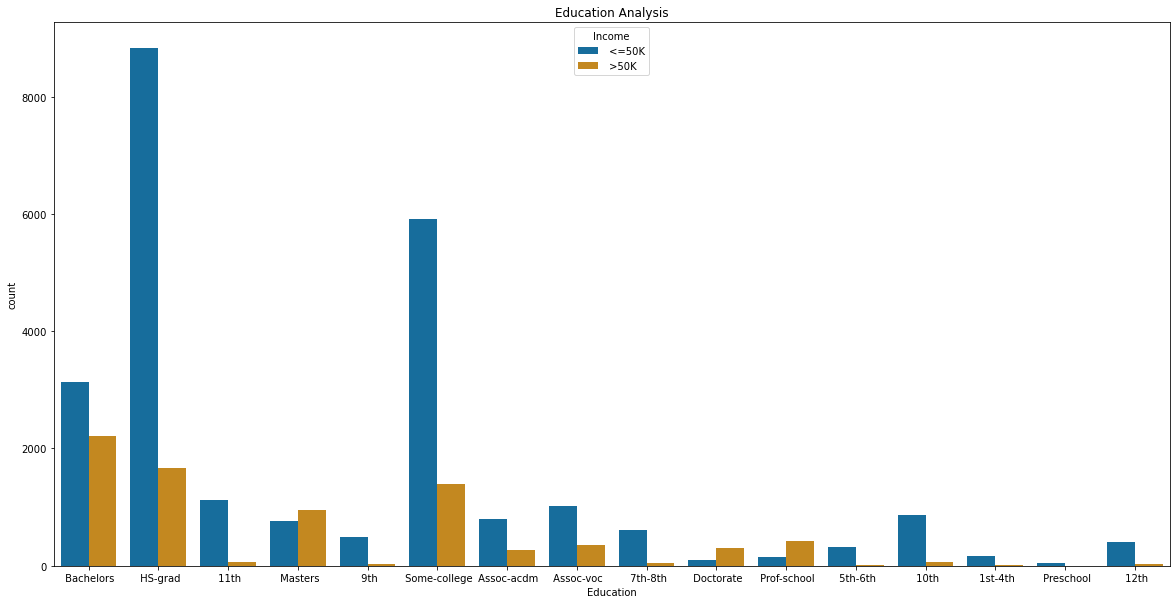

In [14]:
# Countplot Display distribution of data across Education Analysis.
plt.figure(figsize=(20,10))
plt.title('Education Analysis')
sns.countplot(x='Education',hue='Income',data=df,palette='colorblind')

<AxesSubplot:title={'center':'Education vs Education number'}, xlabel='Education', ylabel='Education_num'>

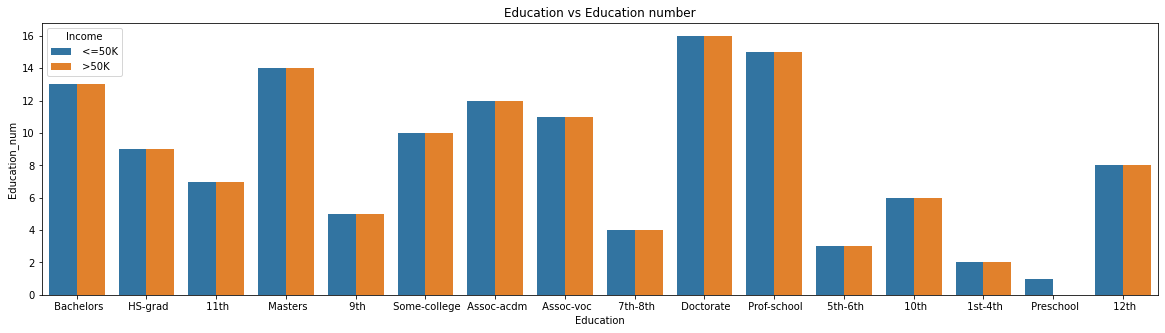

In [15]:
# Barplot Display distribution of data across all level of category
plt.figure(figsize=(20,5))
plt.title('Education vs Education number')
sns.barplot(x='Education',y='Education_num',hue='Income',data=df)

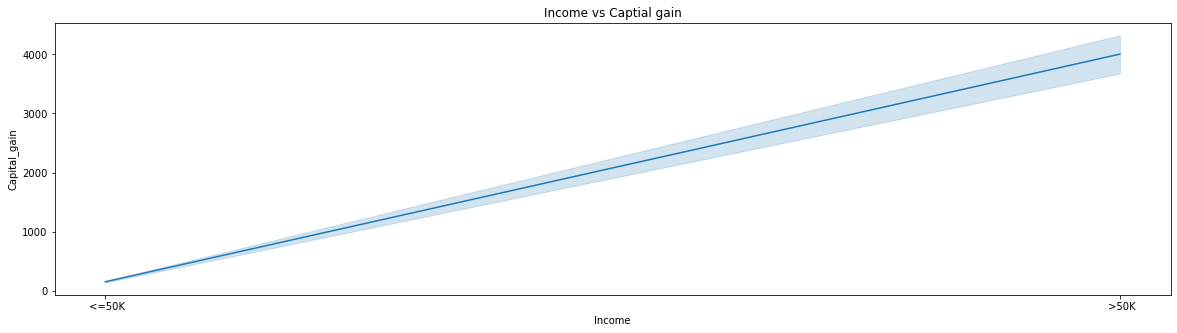

In [16]:
# Lineplot Display distribution of data across Income vs Captial gain.
plt.figure(figsize=(20,5))
plt.title('Income vs Captial gain')
sns.lineplot(x='Income',y='Capital_gain',data=df)
plt.show()

As the captial gain increase  for the person frequently income is also high.

Graphical Represention Conclusion:

According to the data, the person with <=50k has more no.of people but captial gain is more for income above >50k.

# Preprocessing

Check unique functions in dataset

In [17]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [18]:
df['Workclass'].replace([' ?'],['nan'],inplace=True)

In [19]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', 'nan', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [20]:
df['Fnlwgt'].unique()

array([ 83311, 215646, 234721, ...,  34066,  84661, 257302], dtype=int64)

In [21]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [22]:
df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [23]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [24]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [25]:
df['Occupation'].replace([' ?'],['nan'],inplace=True)

In [26]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', 'nan', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [27]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [28]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [29]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [30]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [31]:
df['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [32]:
df['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [33]:
df['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [34]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [35]:
df['Native_country'].replace([' ?'],['nan'],inplace=True)

In [36]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 'nan', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [37]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [38]:
df.isnull().sum()                                      # Check null values in dataset                                

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

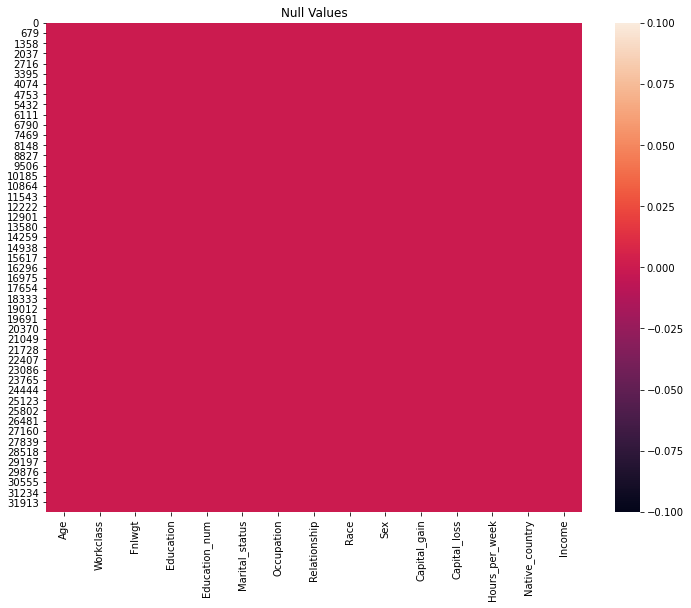

In [39]:
#Heatmap Display distribution of data across all level of category
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [40]:
df.dtypes                                            # Check datatypes in dataset

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Converting all Object attributes into Numerical attributes by using LabelEncoder 

In [41]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [42]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [43]:
df.dtypes                                    # Check datatypes in dataset after label encoding. 

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

In [44]:
df.describe()                                        #statistics summary for numerical columns

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.376290,1.897818e+05,10.298249,10.080590,2.611794,6.421959,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.470823,0.240817
std,13.640642,1.581995,1.055498e+05,3.870317,2.572709,1.506225,4.328539,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.083180,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


<AxesSubplot:>

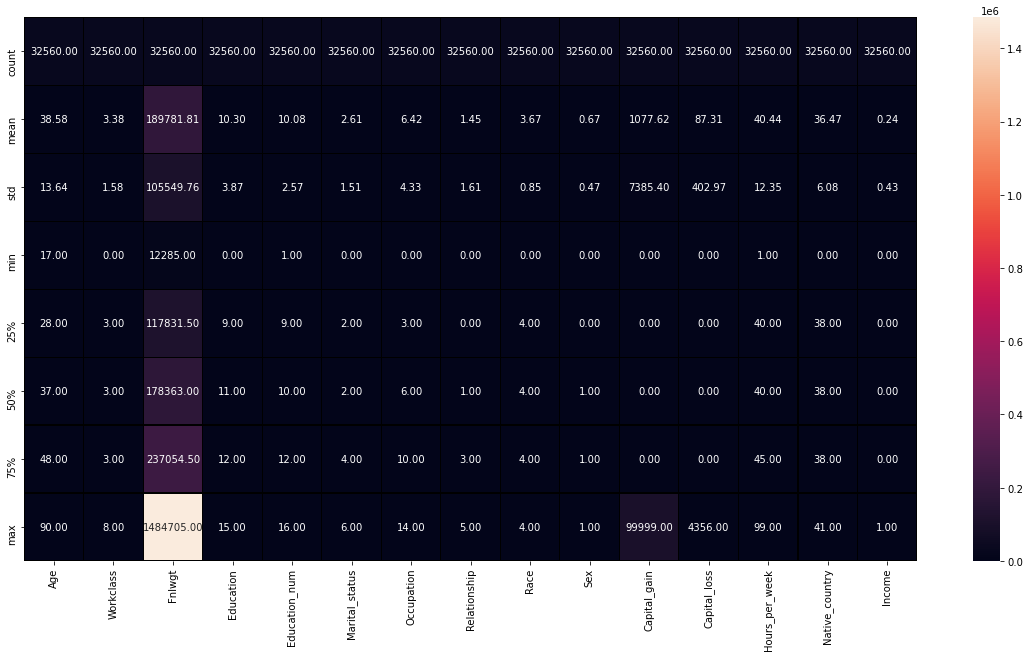

In [45]:
#Heatmap Display distribution of data across all level of category
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Correlation Matrix

In [46]:
dfcor=df.corr()                                         # Check Correlation in dataset
dfcor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.059424,-0.076646,-0.010508,0.036527,-0.266292,0.012628,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000176,0.234039
Workclass,0.059424,1.000000,-0.019111,-0.019358,-0.054412,0.042191,0.312611,0.012832,0.018893,0.002270,0.010680,-0.009878,-0.093413,0.001240,-0.055098
Fnlwgt,-0.076646,-0.019111,1.000000,-0.028156,-0.043159,0.028184,-0.000569,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.062703,-0.009481
Education,-0.010508,-0.019358,-0.028156,1.000000,0.359172,-0.038398,-0.046460,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.075189,0.079311
Education_num,0.036527,-0.054412,-0.043159,0.359172,1.000000,-0.069338,0.044150,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.090270,0.335182
Marital_status,-0.266292,0.042191,0.028184,-0.038398,-0.069338,1.000000,0.052891,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.020463,-0.199295
Occupation,0.012628,0.312611,-0.000569,-0.046460,0.044150,0.052891,1.000000,-0.014638,-0.009948,0.026149,0.012357,0.004530,-0.056999,-0.000467,0.010777
Relationship,-0.263698,0.012832,0.008922,-0.010879,-0.094145,0.185461,-0.014638,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010938,-0.250924
Race,0.028718,0.018893,-0.021278,0.014135,0.031825,-0.068025,-0.009948,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.111294,0.071853
Sex,0.088832,0.002270,0.026882,-0.027349,0.012256,-0.129337,0.026149,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.003007,0.215995


<AxesSubplot:>

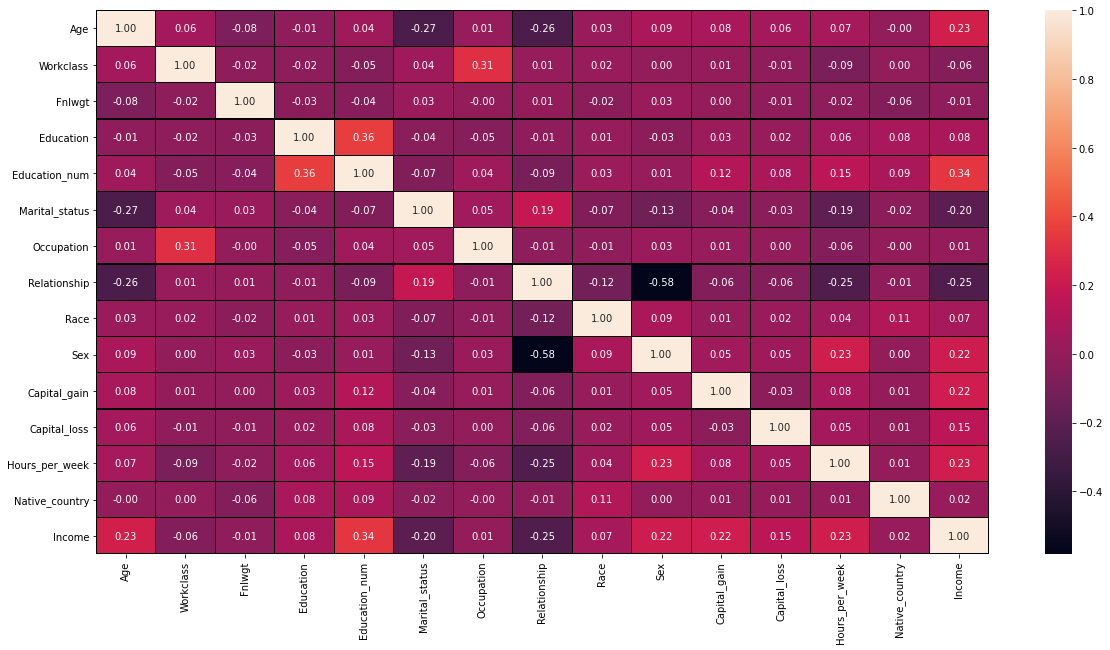

In [47]:
#Heatmap Display distribution of data across all level of category
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Removing Outliers from the Dataset

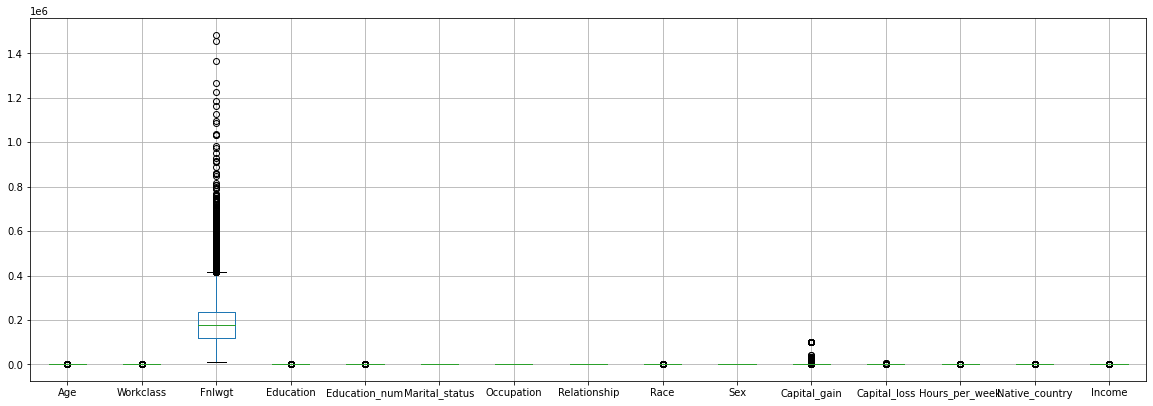

In [48]:
# Boxplot Display distribution of data across all level of category
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.83709708, 1.02638429, 1.0087417 , ..., 2.22212013, 0.25138175,
        0.5632099 ],
       [0.04264043, 0.23786147, 0.24504633, ..., 0.03542999, 0.25138175,
        0.5632099 ],
       [1.05703146, 0.23786147, 0.42576955, ..., 0.03542999, 0.25138175,
        0.5632099 ],
       ...,
       [1.42358875, 0.23786147, 0.3588108 , ..., 0.03542999, 0.25138175,
        0.5632099 ],
       [1.21562378, 0.23786147, 0.11092744, ..., 1.65520046, 0.25138175,
        0.5632099 ],
       [0.98372   , 0.39426141, 0.92986178, ..., 0.03542999, 0.25138175,
        1.77553698]])

In [50]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0


In [51]:
df.shape                                                # Check the shape of the dataset   

(32560, 15)

In [52]:
df_new.shape                                            # Check new shape of the dataset after removal of outliers

(27783, 15)

In [53]:
Data_loss=((1000-980)/1000*100)                         # Check data loss in dataset after removal of outliers
Data_loss

2.0

# To ckeck distribution of Skewness.

In [54]:
df.skew()                                                       # Check Skewness in dataset

Age                0.558738
Workclass          1.167293
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.126702
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.205890
Income             1.212383
dtype: float64

In [55]:
x=df.drop('Income',axis=1)
y=df['Income']

In [56]:
x.skew()

Age                0.558738
Workclass          1.167293
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.126702
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.205890
dtype: float64

To handle Skewness using Power transform function.

In [57]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [58]:
df_new.skew()

Age              -0.013897
Workclass         0.136107
Fnlwgt            0.016914
Education        -0.309431
Education_num     0.023885
Marital_status   -0.114201
Occupation       -0.203407
Relationship      0.122917
Race             -2.010817
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
Native_country   -1.596543
dtype: float64

In [59]:
x=df_new
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.891947,1.048189,-1.089889,-0.477012,1.164793,-0.383427,-0.701180,-1.094635,0.412893,0.703087,-0.30137,-0.221213,-2.221515,0.206067
1,0.102717,-0.155415,0.398743,0.090482,-0.464330,-1.782434,-0.195068,0.134511,0.412893,0.703087,-0.30137,-0.221213,-0.035570,0.206067
2,1.064381,-0.155415,0.562540,-2.067600,-1.200274,-0.383427,-0.195068,-1.094635,-2.431920,0.703087,-0.30137,-0.221213,-0.035570,0.206067
3,-0.731663,-0.155415,1.340398,-0.477012,1.164793,-0.383427,0.652979,1.549018,-2.431920,-1.422298,-0.30137,-0.221213,-0.035570,-3.176403
4,0.028023,-0.155415,0.957182,0.395133,1.600809,-0.383427,-0.701180,1.549018,0.412893,-1.422298,-0.30137,-0.221213,-0.035570,0.206067


# Classification model

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.7, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is " ,maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8291944541944541  on Random_state  8


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .7, random_state = 8)

# Logistic Regression model

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8291944541944541
[[16265  1046]
 [ 2847  2634]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     17311
           1       0.72      0.48      0.58      5481

    accuracy                           0.83     22792
   macro avg       0.78      0.71      0.73     22792
weighted avg       0.82      0.83      0.82     22792



# Decision Tree Classifier model

In [63]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

0.7975605475605475
[[14856  2455]
 [ 2159  3322]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     17311
           1       0.58      0.61      0.59      5481

    accuracy                           0.80     22792
   macro avg       0.72      0.73      0.73     22792
weighted avg       0.80      0.80      0.80     22792



# Random Forest Classifier Model

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8497279747279747
[[16026  1285]
 [ 2140  3341]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     17311
           1       0.72      0.61      0.66      5481

    accuracy                           0.85     22792
   macro avg       0.80      0.77      0.78     22792
weighted avg       0.84      0.85      0.85     22792



# SVC Model

In [65]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8327483327483327
[[16194  1117]
 [ 2695  2786]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.89     17311
           1       0.71      0.51      0.59      5481

    accuracy                           0.83     22792
   macro avg       0.79      0.72      0.74     22792
weighted avg       0.82      0.83      0.82     22792



We are getting highest accuracy with Random Forest Classifier (85%). but it can be due to overhitting also so we well check cross validation scores.

# Cross Validation of model

In [66]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("cross validation score of LogisticRegression model:",scr.mean())

cross validation score of LogisticRegression model: 0.8249078624078624


In [67]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x, y, cv=5)
print("cross validation score of DecisionTree model:",scr.mean())

cross validation score of DecisionTree model: 0.8011056511056511


In [68]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x, y, cv=5)
print("cross validation score of RandomForest model:",scr.mean())

cross validation score of RandomForest model: 0.85


In [69]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model:",scr.mean())

cross validation score of SVC model: 0.8362407862407863


Min difference in accuracy and cross validation score is for Random Forest model . so this is our best model.

# Hyper parameter Tuning

In [70]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

Hyperparameter tuning for Logistic Regression Model

In [71]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
             'C':[1e-5,1e-4,1e-2,1e-1,1,10,100]}
             
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']})

In [72]:
GCV.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [73]:
mod=LogisticRegression(C=0.01,penalty='l1',solver='liblinear',random_state=8)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.86679536679536


ROC_AUC Score for Logistic Regressor Model

In [74]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf=LogisticRegression(C=0.01,penalty='l1',solver='liblinear',random_state=8).fit(X,y)
roc_auc_score(y,clf.predict_proba(X)[:,1])
roc_auc_score(y,clf.decision_function(X))

0.974472807991121

ROC_AUC curve for Logistic Regressor Model

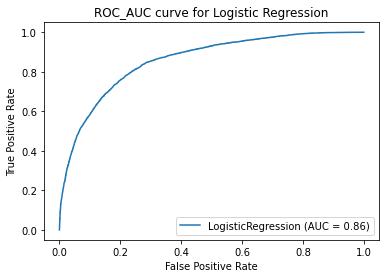

In [75]:
lr=LogisticRegression(C=0.01,penalty='l1',solver='liblinear',random_state=8)
lr.fit(x_train,y_train)
lr_disp=plot_roc_curve(lr,x_test,y_test)
plt.title('ROC_AUC curve for Logistic Regression')
plt.show()

Hyperparameter tuning for Decision Tree Classifier Model

In [76]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),
             'criterion':['gini','entropy']}
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [77]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [78]:
mod=DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=8)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

84.42874692874693


ROC_AUC Score for Decision Tree Classifier Model

In [79]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf1=DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=8).fit(X,y)
roc_auc_score(y,clf1.predict_proba(X)[:,1])

0.999874478093124

ROC_AUC curve for Decision Tree Classifier Model

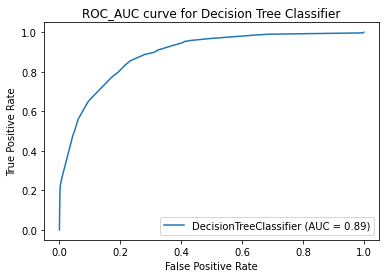

In [80]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=8)
dt.fit(x_train,y_train)
dt_disp=plot_roc_curve(dt,x_test,y_test)
plt.title('ROC_AUC curve for Decision Tree Classifier')
plt.show()

Hyperparameter tuning for Random Forest Classifier Model

In [81]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto','sqrt','log2']}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']})

In [82]:
GCV.best_params_

{'max_features': 'auto'}

In [83]:
mod=RandomForestClassifier(max_features='auto',random_state=8)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

84.95963495963495


ROC_AUC Score for Random Forest Classifier Model

In [84]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf2=RandomForestClassifier(max_features='auto',random_state=8).fit(X,y)
roc_auc_score(y,clf2.predict_proba(X)[:,1])

1.0

ROC_AUC curve for Random Forest Classifier Model

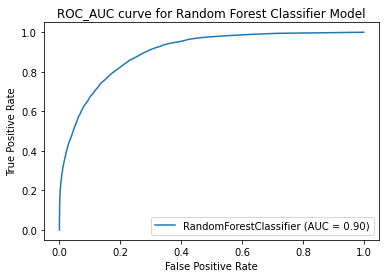

In [85]:
rf=RandomForestClassifier(max_features='auto',random_state=8)
rf.fit(x_train,y_train)
rf_disp=plot_roc_curve(rf,x_test,y_test)
plt.title('ROC_AUC curve for Random Forest Classifier Model')
plt.show()

Hyperparameter tuning for SVC model

In [86]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}
GCV=GridSearchCV(SVC(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [87]:
GCV.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [88]:
mod=SVC(C=1,gamma=0.1,kernel='rbf',random_state=8)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

83.3932958932959


ROC_AUC Score for SVC Model

In [89]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf2=SVC(C=1,gamma=0.1,kernel='rbf',random_state=8).fit(X,y)
roc_auc_score(y,clf2.predict(X))

1.0

ROC_AUC curve for SVC Model

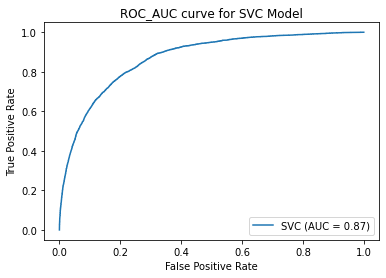

In [90]:
svc=SVC(C=1,gamma=0.1,kernel='rbf',random_state=8)
svc.fit(x_train,y_train)
svc_disp=plot_roc_curve(svc,x_test,y_test)
plt.title('ROC_AUC curve for SVC Model')
plt.show()

Compare with Actual Final Vs Sample Prediction

,Y Test,Prediction
20942,0,0
31535,0,0
14149,0,0
2407,0,0
11139,0,0


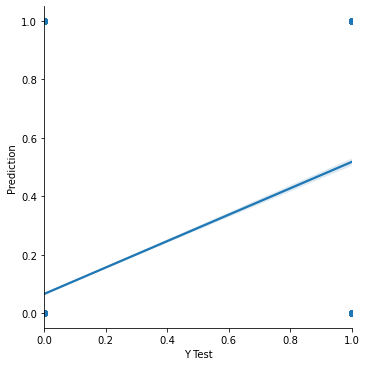

In [91]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':pred},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

# Saving the Model

In [92]:
import joblib
joblib.dump(mod,"Census Income project.pkl")

['Census Income project.pkl']

# Loading the saved model

In [93]:
model=joblib.load("Census Income project.pkl")
prediction=model.predict(x_test)
print(accuracy_score(y_test,prediction)*100)

83.3932958932959


In [94]:
prediction=pd.DataFrame(prediction)  # Converting into Data Frame
prediction.to_csv('Results of Census Income project.csv')
prediction.head()

,0
0,0
1,0
2,0
3,0
4,0
